In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=12)
SMALL_SIZE = 9
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', family='serif', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams.update({
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.2,
    "lines.linewidth": 1,
})

In [19]:
from NTU_sim import NTU_processor, NTU_compiler, NTU_single_sim, NTU_sim_test_run

In [53]:
VStd = 0.1
phaseStd = 0.382 / 180 * np.pi

detuningStd = 52769
samplingRate = 5898.24e6 # 5.89824 GS/s
omega = 10e6 # 20MHz

VNaught = 1
hbar = 1
phiNaught = 0
aNaught = 25 / 46

V = VNaught + np.random.normal(scale=VStd)
phi = phiNaught + np.random.normal(scale=phaseStd)
I = np.cos(phi)
Q = np.sin(phi)

# Decoherence time
T1 = 8.66e-6
T1_err = 0.49
T2 = 9.08e-6
T2_err = 0.74e-6
T2_echo = 16.14e-6
T2_echo_err = 3.21e-6

In [54]:
param_dict ={"VNaught": VNaught, "VStd": VStd, "phaseStd":phaseStd,
            "omega": omega, "aNaught": aNaught, "detuningStd": detuningStd,
            "pulse_amplitude": 20e6, "FPGA_noise_strength":0.3}

## Plot baseline vs with FPGA noise and decoherence

In [63]:
num_qubits = 1
num_gates_list = np.arange(5,145,10)
num_samples = 20

In [64]:
fidelity_baseline, error_baseline = NTU_sim_test_run(
    num_qubits, num_gates_list, num_samples, param_dict,
    add_FPGA_noise = False, t1 = None, t2 = None)
fidelity_t1t2, error_t1t2 = NTU_sim_test_run(
    num_qubits, num_gates_list, num_samples, param_dict,
    add_FPGA_noise = False, t1 = T1, t2 = T2)
fidelity_FPGA, error_FPGA = NTU_sim_test_run(
    num_qubits, num_gates_list, num_samples, param_dict,
    add_FPGA_noise = True, t1 = None, t2 = None)
fidelity_FPGA_t1t2, error_FPGA_t1t2 = NTU_sim_test_run(
    num_qubits, num_gates_list, num_samples, param_dict,
    add_FPGA_noise = True, t1 = T1, t2 = T2)

Text(0, 0.5, 'Ground State Fidelity')

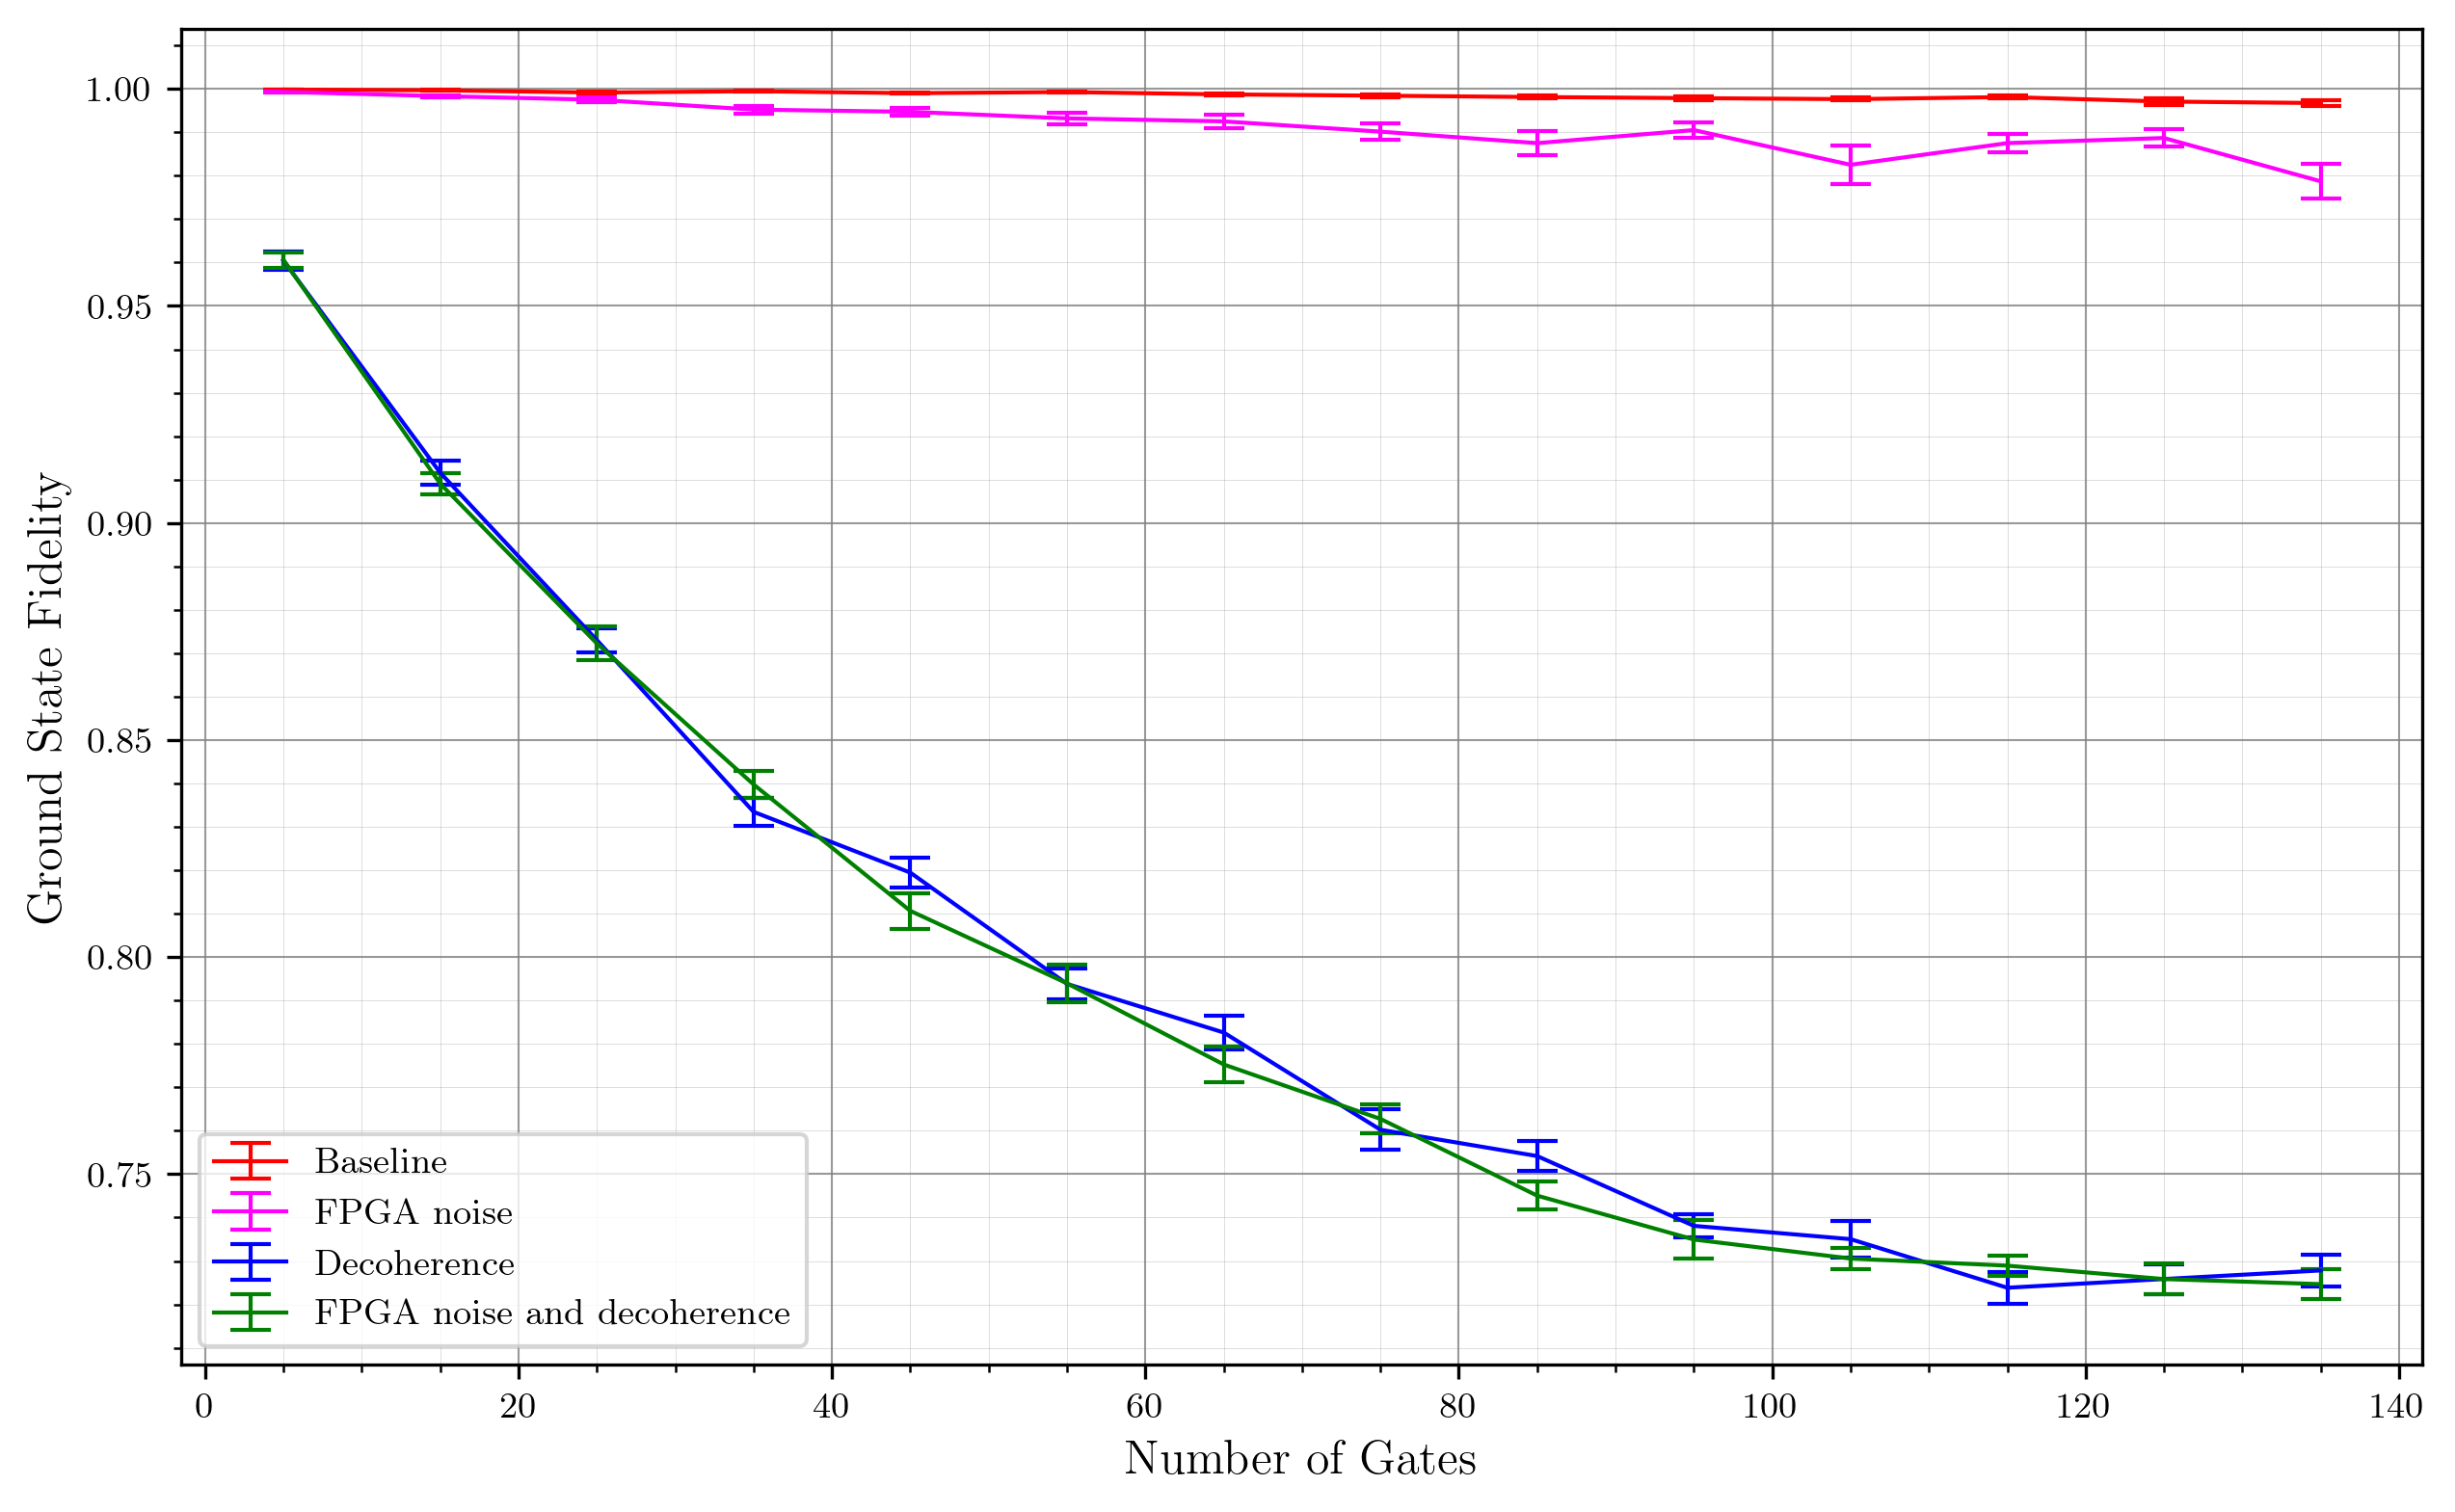

In [76]:
plt.figure(figsize=(10, 6), dpi = 300)
plt.autoscale(enable=True, axis="y", tight=False)
plt.errorbar(num_gates_list, fidelity_baseline, yerr=error_baseline, 
             color='red', capsize=5,label = 'Baseline')
plt.errorbar(num_gates_list, fidelity_FPGA, yerr=error_FPGA, 
             color='magenta', capsize=5, label = 'FPGA noise')
plt.errorbar(num_gates_list, fidelity_t1t2, yerr=error_t1t2, 
             color='blue', capsize=5, label = 'Decoherence')
plt.errorbar(num_gates_list, fidelity_FPGA_t1t2, yerr=error_FPGA_t1t2, 
             color='green', capsize=5, label = 'FPGA noise and decoherence')
plt.legend()
plt.minorticks_on()
plt.grid(True, which='major', linewidth = 0.5, alpha=0.8)
plt.grid(True, which='minor', linestyle='-', alpha=0.3)
plt.xlabel("Number of Gates")
plt.ylabel("Ground State Fidelity")

## Plot fidelity of different noise strength

In [46]:
num_qubits = 1
num_gates_list = np.arange(5,105,10)
num_samples = 10

In [47]:
my_dict = {}
dictionary_key = []
for noise_strength in np.linspace(1/8000,1,20):
    fidelity_diff_strength, error_diff_strength = NTU_sim_test_run(
        num_qubits, num_gates_list, num_samples, 
        param_dict = {"VNaught": VNaught, "VStd": VStd, "phaseStd":phaseStd,
                     "omega": omega, "aNaught": aNaught, "detuningStd": detuningStd,
                     "pulse_amplitude": 20e6, "FPGA_noise_strength":noise_strength},
        add_FPGA_noise = True, t1 = T1, t2 = T2
    )
    dictionary_key = f"FPGA noise strength = {int(noise_strength*8000)}"
    my_dict[dictionary_key] = [fidelity_diff_strength, error_diff_strength]

Text(0, 0.5, 'Ground State Fidelity')

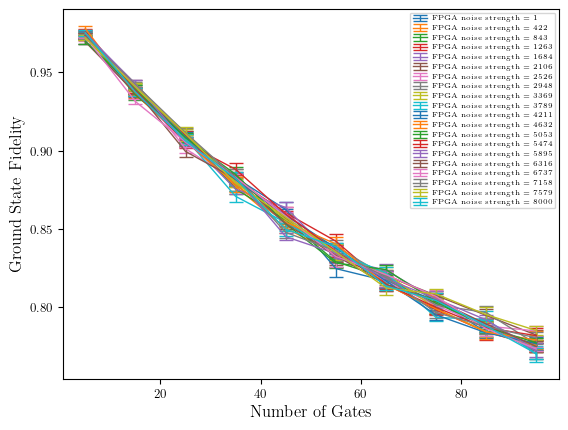

In [48]:
plt.autoscale(enable=True, axis="y", tight=False)
for key in my_dict:
    plt.errorbar(num_gates_list, my_dict[key][0], yerr=my_dict[key][1], 
                capsize=5,label = key)
plt.legend(fontsize="5")
plt.xlabel("Number of Gates")
plt.ylabel("Ground State Fidelity")

## Plot fidelity against FPGA noise for the same number of gates

In [49]:
fidelity_const_gate = []
noise_const_gate = np.linspace(1/8000,1,20)
error_const_gate = []
for noise_strength in np.linspace(1/8000,1,20):
    fidelity_30, error_30 = NTU_sim_test_run(
        num_qubits, [30], 30, 
        param_dict = {"VNaught": VNaught, "VStd": VStd, "phaseStd":phaseStd,
                     "omega": omega, "aNaught": aNaught, "detuningStd": detuningStd,
                     "pulse_amplitude": 20e6, "FPGA_noise_strength":noise_strength},
        add_FPGA_noise = True, t1 = T1, t2 = T2
    )
    fidelity_const_gate.append(fidelity_30)
    error_const_gate.append(error_30)

Text(0, 0.5, 'Ground State Fidelity')

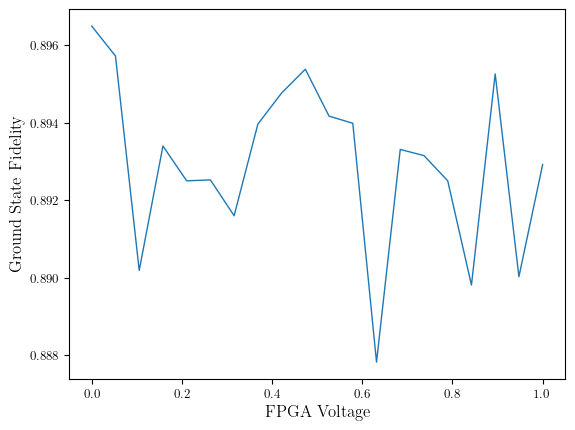

In [77]:
plt.autoscale(enable=True, axis="y", tight=False)
plt.plot(noise_const_gate,fidelity_const_gate)

plt.xlabel("FPGA Voltage")
plt.ylabel("Ground State Fidelity")